Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 00:23:59--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 00:24:00--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 00:24:00 (48.6 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})



In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



RTA: Ya que K-means es sensible a diferntes escalas, es importante normalizar los datos que se van a tartar esten en una misma escala o normalizados.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


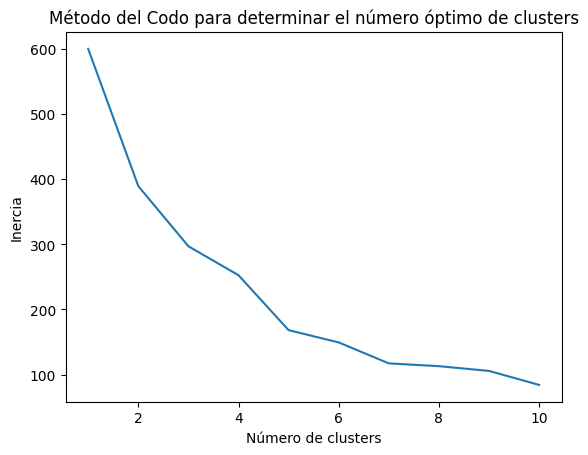

In [12]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

RTA: el codo se forma cuando hay 5 clusters. asi que a partir de 5 cluster ya no es óptimo añadir más.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [13]:
optimal_clusters = 5  # Ajusta según lo determinado en el método del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

RTA: El cluster 2 y 3  muestran los clientes con mayores ingresos anuales que stan entre 32 y 40 años, pero el cluster 2 tambien tiene la población con mayor calificación de gasto, mientra el 2 tiene la peor calificación de gasto, esto quiere decir que hombre y mujeres alrededor de los 32 años tiene un alto ingrso y generalmente gastan mucho más que los otros. Cluster 3 Mujeres en los 42 años tiene unos ingresos bajos y la menor calificación de gasto dentro de todos los clientes.

In [14]:
# Agrupamos los datos por cluster y calculamos los promedios
cluster_description = data.groupby('Cluster').mean()

# Mostramos la descripción de cada cluster
cluster_description

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,83.872340,0.574468,55.638298,54.382979,48.851064
1,159.743590,0.487179,39.871795,86.102564,19.358974
2,161.025000,0.550000,32.875000,86.100000,81.525000
3,24.100000,0.600000,46.250000,26.750000,18.350000
4,55.648148,0.592593,25.185185,41.092593,62.240741


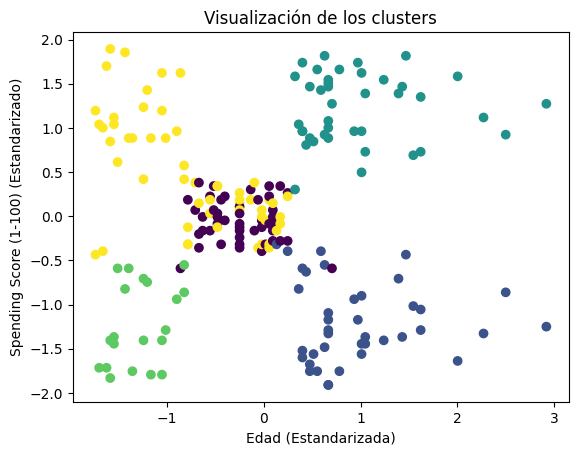

In [19]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=data['Cluster'], cmap='viridis')
plt.xlabel('Edad (Estandarizada)')
plt.ylabel('Spending Score (1-100) (Estandarizado)')
plt.title('Visualización de los clusters')
plt.show()



Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [20]:
cluster_description = data.groupby('Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
cluster_description

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.638298,54.382979,48.851064
1,39.871795,86.102564,19.358974
2,32.875000,86.100000,81.525000
3,46.250000,26.750000,18.350000
4,25.185185,41.092593,62.240741


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



RTA: Los clusters 4 y 2 son  don de se encuentran los clientes de menor edad, el cluster 2 es un cluster con los clientes de mayor ingreso anual y con el puntaje de gasto más alto a diferencia el 3 que tiene los clientes de menor ingreso y con menor puntaje de gasto.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

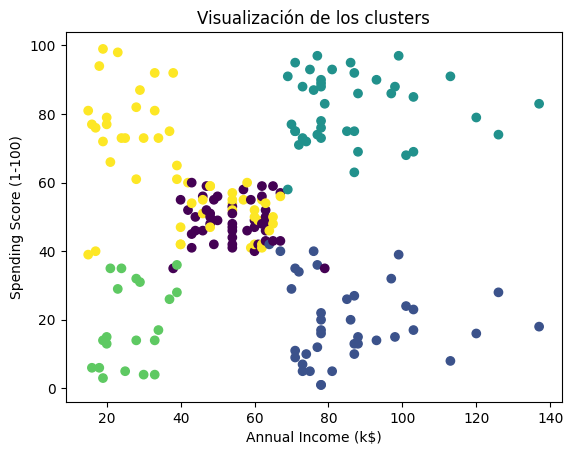

In [23]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualización de los clusters')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

RTA: En los clusters de color azul y verde no esta totalmente clara la diferencia en los clientes, que si se nota en el cluster de color morado.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [24]:
cluster_names = {
    0: "Mayores con Ingresos Medios, Gastos Medios",
    1: "Adultos con Ingresos Altos, Gastos Bajos",
    2: "Adultos con Ingresos Altos, Gastos Altos",
    3: "Adultos con Ingresos Bajos, Gastos Bajos",
    4: "Jovenes con Ingresos Medios, Gastos Medio Altos"
}

In [25]:
for cluster, name in cluster_names.items():
    print(f"Cluster {cluster}: {name}")

Cluster 0: Mayores con Ingresos Medios, Gastos Medios
Cluster 1: Adultos con Ingresos Altos, Gastos Bajos
Cluster 2: Adultos con Ingresos Altos, Gastos Altos
Cluster 3: Adultos con Ingresos Bajos, Gastos Bajos
Cluster 4: Jovenes con Ingresos Medios, Gastos Medio Altos


In [27]:
cluster_description['Cluster_Name'] = cluster_description.index.map(cluster_names)
cluster_description

,Age,Annual Income (k$),Spending Score (1-100),Cluster_Name
Cluster,,,,
0,55.638298,54.382979,48.851064,"Mayores con Ingresos Medios, Gastos Medios"
1,39.871795,86.102564,19.358974,"Adultos con Ingresos Altos, Gastos Bajos"
2,32.875000,86.100000,81.525000,"Adultos con Ingresos Altos, Gastos Altos"
3,46.250000,26.750000,18.350000,"Adultos con Ingresos Bajos, Gastos Bajos"
4,25.185185,41.092593,62.240741,"Jovenes con Ingresos Medios, Gastos Medio Altos"
